In [1]:
import pandas as pd

In [2]:
data_train = pd.read_csv("tripadvisor_train.csv")

In [3]:
data_train.head()
data_train.tail()
data_train.info()
data_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       12295 non-null  object
 1   Rating       12295 non-null  int64 
 2   Rating_name  12295 non-null  object
dtypes: int64(1), object(2)
memory usage: 288.3+ KB


,Rating
count,12295.000000
mean,2.947377
std,1.237298
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [4]:
data_val = pd.read_csv("tripadvisor_val.csv")

In [5]:
data_val.head()
data_val.tail()
data_val.info()
data_val.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       4099 non-null   object
 1   Rating       4099 non-null   int64 
 2   Rating_name  4099 non-null   object
dtypes: int64(1), object(2)
memory usage: 96.2+ KB


,Rating
count,4099.000000
mean,2.942913
std,1.231267
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [6]:
data_test = pd.read_csv("tripadvisor_test.csv")

In [7]:
data_test.head()
data_test.tail()
data_test.info()
data_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       4099 non-null   object
 1   Rating       4099 non-null   int64 
 2   Rating_name  4099 non-null   object
dtypes: int64(1), object(2)
memory usage: 96.2+ KB


,Rating
count,4099.000000
mean,2.976336
std,1.221723
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,4.000000


In [8]:
import numpy as np
import pandas as pd
import torch
import transformers as ppb # pytorch transformers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [9]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

In [11]:
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
# model = model_class.from_pretrained(pretrained_weights)

In [12]:
import tensorflow as tf

maxlen = 256

tokenized_train = data_train["Review"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
X_train = tf.keras.preprocessing.sequence.pad_sequences(tokenized_train, maxlen=maxlen)
y_train = data_train["Rating"].values

tokenized_val = data_val["Review"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
X_val = tf.keras.preprocessing.sequence.pad_sequences(tokenized_val, maxlen=maxlen)
y_val = data_val["Rating"].values

tokenized_test = data_test["Review"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
X_test = tf.keras.preprocessing.sequence.pad_sequences(tokenized_test, maxlen=maxlen)
y_test = data_test["Rating"].values

Token indices sequence length is longer than the specified maximum sequence length for this model (872 > 512). Running this sequence through the model will result in indexing errors


In [51]:
# X_train
# y_train

In [52]:
# tokens_tensor = torch.tensor(X_train)
# segments_tensors = torch.tensor(y_train)

In [80]:
'''
from transformers import BertModel
# Load pre-trained model (weights)
model = c.from_pretrained('bert-base-uncased',
                                  output_hidden_states = False, # Whether the model returns all hidden-states.
                                  )
# model.eval()
'''

"\nfrom transformers import BertModel\n# Load pre-trained model (weights)\nmodel = c.from_pretrained('bert-base-uncased',\n                                  output_hidden_states = False, # Whether the model returns all hidden-states.\n                                  )\n# model.eval()\n"

In [74]:
'''
from transformers import BertModel
# BertForSequenceClassification
model = BertModel.from_pretrained("bert-base-uncased",
                                                      num_labels=len(y_train),
                                                      output_attentions=False,
                                                      output_hidden_states=False)
'''

max_features = 30523

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 8, input_length=maxlen),
    tf.keras.layers.Conv1D(32, 7, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(units=5, activation='softmax')
]) 

model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model.summary()


'''
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, emb_size, input_length=maxlen),
    tf.keras.layers.Conv2D(32, 7, activation='relu'),
    tf.keras.layers.MaxPooling1D(5),
    tf.keras.layers.Conv1D(32, 7, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(units=5, activation='softmax')
]) 

model.compile(optimizer='adam',
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])

model.summary()
'''

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 256, 8)            244184    
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 250, 32)           1824      
_________________________________________________________________
flatten_9 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               1024128   
_________________________________________________________________
dense_63 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_64 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_65 (Dense)             (None, 5)               

'\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Embedding(max_features, emb_size, input_length=maxlen),\n    tf.keras.layers.Conv2D(32, 7, activation=\'relu\'),\n    tf.keras.layers.MaxPooling1D(5),\n    tf.keras.layers.Conv1D(32, 7, activation=\'relu\'),\n    tf.keras.layers.GlobalMaxPooling1D(),\n    tf.keras.layers.Dense(units=5, activation=\'softmax\')\n]) \n\nmodel.compile(optimizer=\'adam\',\n                  loss="sparse_categorical_crossentropy",\n                  metrics=[\'accuracy\'])\n\nmodel.summary()\n'

In [75]:
h = model.fit(X_train,
              y_train,
              epochs=5,
              batch_size=32,
              validation_data=(X_val, y_val))


'''
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

h = model.fit(X_train, 
            y_train,
            epochs=5,
            verbose=1,
            batch_size=8,
            callbacks=[callback],
            validation_data=(X_val, y_val))
'''

Epoch 1/5
385/385 [==============================] - 11s 27ms/step - loss: 1.2417 - accuracy: 0.4694 - val_loss: 0.9717 - val_accuracy: 0.5577
Epoch 2/5
385/385 [==============================] - 9s 22ms/step - loss: 0.7739 - accuracy: 0.6510 - val_loss: 0.9878 - val_accuracy: 0.5626
Epoch 3/5
385/385 [==============================] - 8s 21ms/step - loss: 0.4755 - accuracy: 0.8128 - val_loss: 1.2811 - val_accuracy: 0.5704
Epoch 4/5
385/385 [==============================] - 8s 21ms/step - loss: 0.2453 - accuracy: 0.9097 - val_loss: 2.0020 - val_accuracy: 0.5287
Epoch 5/5
385/385 [==============================] - 8s 22ms/step - loss: 0.0967 - accuracy: 0.9690 - val_loss: 2.6445 - val_accuracy: 0.5489


"\ncallback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)\n\nh = model.fit(X_train, \n            y_train,\n            epochs=5,\n            verbose=1,\n            batch_size=8,\n            callbacks=[callback],\n            validation_data=(X_val, y_val))\n"

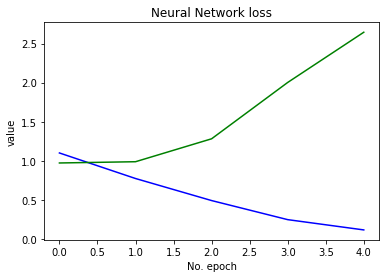

In [76]:
import matplotlib.pyplot as plt

plt.plot(h.history['loss'], label='(training data)',color='blue')
plt.plot(h.history['val_loss'], label='(val data)',color='green')
plt.title('Neural Network loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

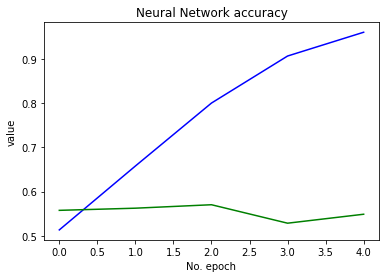

In [78]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'], label='(training data)',color='blue')
plt.plot(h.history['val_accuracy'], label='(val data)',color='green')
plt.title('Neural Network accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [79]:
results = model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

129/129 [==============================] - 1s 6ms/step - loss: 2.6830 - accuracy: 0.5557
test loss, test acc: [2.683027744293213, 0.5557453036308289]


In [ ]:
data_test_fresh = pd.read_csv("tripadvisor_test.csv")

In [ ]:
preds = np.round(model.predict(X_test[:100]))
for i in range(len(preds)):
    print(data_test_fresh['Review'].values[i][:100], '...')
    print("Pred: ", preds[i], "Real: ", y_test[i])

In [59]:
text = str(data_train["Review"])

In [60]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

wordcloud = WordCloud().generate(text)


In [61]:
from PIL import Image

wine_mask = np.array(Image.open("img/wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [62]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [63]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

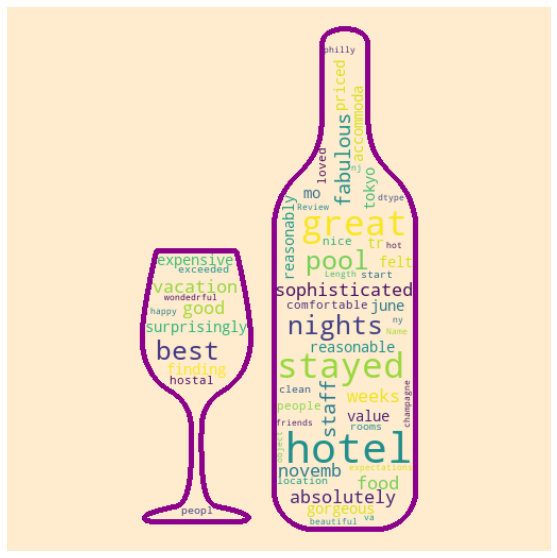

In [64]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="blanchedalmond",
               max_words=1000, 
               mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=5, contour_color='darkmagenta')

wc.generate(text)

wc.to_file("img/wine.png")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()